# Data Science Project - Sales Forecast

- Our Challenge is to be able to predict the sales that we will have in a certain period based on the advertising expenses in the 3 major networks that the Hashtag company invests in: TV, Newspaper and Radio


- Data Base: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

###  Step by Step of a Data Science Project

- Step 1: Understanding the Challenge
- Step 2: Understanding the Area/Company
- Step 3: Data Extraction/Obtaining
- Step 4: Data Adjustment (Treatment/Cleansing)
- Step 5: Exploratory Analysis
- Step 6: Modeling + Algorithms (if necessary this is where Artificial Intelligence comes in)
- Step 7: Interpretation of Results

# Data Science Project - Sales Forecast

- Our challenge is to be able to predict the sales that we will have in a given period based on the advertising expenses in the 3 major networks that Hashtag(fictitious) invests in: TV, Newspaper and Radio
- TV, Newspaper and Radio are in thousands of Reais
- Sales are in millions

#### Import Data Base

In [52]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [53]:
import pandas as pd 

chart = pd.read_csv("advertising.csv")
display(chart)

,TV,Radio,NewsPaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Exploratory Analysis
 Let's try to visualize how the information for each item is distributed
- Let's see the correlation between each of the items

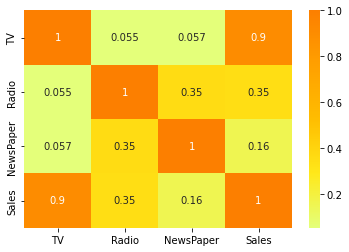

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Create a chart
sns.heatmap(chart.corr(), cmap="Wistia", annot=True)

# Show the chart
plt.show()

#### Then now we can start preparing the data to train the Machine Learning Model

- Separating into training data and test data

In [55]:
y = chart["Sales"]
x = chart[["TV", "Radio", "NewsPaper"]]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


#### We have a regression problem - Let's choose the models we are going to use:

- Linear Regression
- RandomForest (Decision Tree)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create the templates
template_linearregression = LinearRegression()
template_treedecision = RandomForestRegressor()

# Fit the templates
template_linearregression.fit(x_train, y_train)
template_treedecision.fit(x_train, y_train)

RandomForestRegressor()

#### IA Testing and Best Model Evaluation
- Let's use the R² -> tells the % that our model can explain what happens

In [57]:
forecast_linearregression = template_linearregression.predict(x_test)
forecast_treedecision = template_treedecision.predict(x_test)

from sklearn import metrics

print(metrics.r2_score(y_test, forecast_linearregression))
print(metrics.r2_score(y_test, forecast_treedecision))

0.9071151423684273
0.9614428133534113


#### Graphical Preview of Forecasts

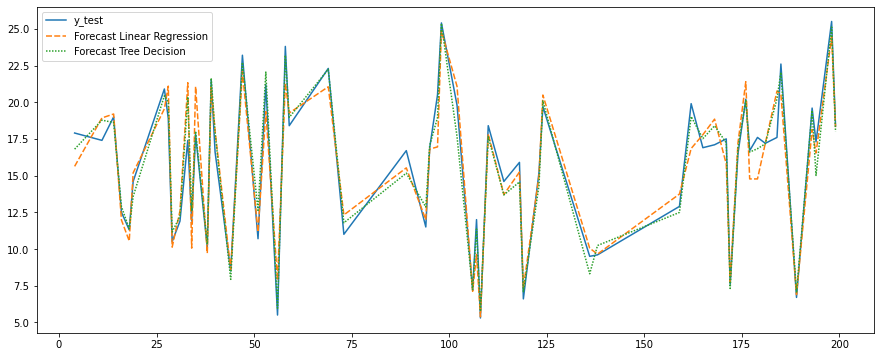

In [58]:
# Tree decision it is the best way to make our predictions
chart_assistant = pd.DataFrame()
chart_assistant["y_test"] = y_test
chart_assistant["Forecast Linear Regression"] = forecast_linearregression
chart_assistant["Forecast Tree Decision"] = forecast_treedecision

plt.figure(figsize=(15, 6))
sns.lineplot(data=chart_assistant)
plt.show()

#### how to make a new prediction

In [59]:
# Importing a new chart with informations to forecast
new_chart = pd.read_csv("news.csv")
display(new_chart)

# Using a templete_treedecision to do a .predict
forecast = template_treedecision.predict(new_chart)
print(forecast)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.693  8.609 20.149]
